In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from plotgraph import show_graph

mnist = input_data.read_data_sets("data/")
x_test= mnist.test.images
y_test= mnist.test.labels

#x_train= mnist.train.images
#y_train= mnist.train.labels


Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
batch_size = 200

tf.reset_default_graph()

saver = tf.train.import_meta_graph("models/uy_ann.ckpt.meta")

graph=tf.get_default_graph()
#for var in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES):
#    print(var)

show_graph(graph)
    

In [4]:
for op in tf.get_default_graph().get_operations():
    print(op.name)

xh
y
hidden1/kernel/Initializer/random_uniform/shape
hidden1/kernel/Initializer/random_uniform/min
hidden1/kernel/Initializer/random_uniform/max
hidden1/kernel/Initializer/random_uniform/RandomUniform
hidden1/kernel/Initializer/random_uniform/sub
hidden1/kernel/Initializer/random_uniform/mul
hidden1/kernel/Initializer/random_uniform
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
hidden1/MatMul
hidden1/BiasAdd
hidden1/Sigmoid
hidden2/kernel/Initializer/random_uniform/shape
hidden2/kernel/Initializer/random_uniform/min
hidden2/kernel/Initializer/random_uniform/max
hidden2/kernel/Initializer/random_uniform/RandomUniform
hidden2/kernel/Initializer/random_uniform/sub
hidden2/kernel/Initializer/random_uniform/mul
hidden2/kernel/Initializer/random_uniform
hidden2/kernel
hidden2/kernel/Assign
hidden2/kernel/read
hidden2/bias/Initializer/zeros
hidden2/bias
hidden2/bias/Assign
hidden2/bias/read
hidden2/Ma

In [8]:
x = tf.get_default_graph().get_tensor_by_name("xh:0")
y = tf.get_default_graph().get_tensor_by_name("y:0")

logits = tf.get_default_graph().get_tensor_by_name("outputs/BiasAdd:0")

correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
y_pred=tf.argmax(tf.nn.softmax(logits),1)

sess= tf.Session()
saver.restore(sess, "models/uy_ann.ckpt")
acc_test = sess.run(accuracy,feed_dict={x: x_test, y: y_test})
print(acc_test)


INFO:tensorflow:Restoring parameters from models/uy_ann.ckpt
0.889


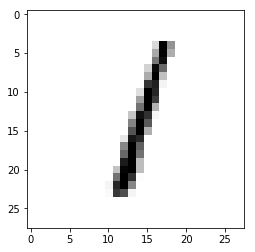

In [10]:
import matplotlib.pyplot as plt

xt=x_test[2:3]
plt.imshow(xt.reshape((28,28)), cmap='binary')
plt.show()

In [11]:
yt=sess.run(y_pred,feed_dict={x: xt})
print(yt)

[1]
